In [1]:
from hossam import load_data
from pandas import DataFrame
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.spatial import ConvexHull

from kneed import KneeLocator

my_dpi=200

In [2]:
origin=load_data('iris')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

1936년 영국의 통계학자 로널드 피셔(Ronald A. Fisher)가 소개한 3가지 품종(setosa, versicolor, virginica)의 붓꽃(Iris)에 대한 꽃받침과 꽃잎의 길이와 너비 측정값으로 구성된 유명한 머신러닝 및 데이터 분석용 데이터셋.(출처: Kaggle)

field         description
------------  -------------
Sepal.Length  꽃밭침 길이
Sepal.Width   꽃밭침 너비
Petal.Length  꽃잎 길이
Petal.Width   꽃잎 너비
Species       품종


===== 데이터 크기 확인 =====
데이터셋 크기 : (150, 5)
행 개수 : 150개
열 개수 : 5개

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df=origin.drop('Species', axis=1)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
klist=list(range(2,11))
inertia=[]

for k in klist:
    estimator=KMeans(n_clusters=k, random_state=0)
    estimator.fit(X=df)
    inertia.append(estimator.inertia_)

inertia

[152.34795176035792,
 78.85566582597731,
 57.228473214285714,
 49.82774055829229,
 42.42154575309748,
 34.420191786283894,
 30.064593073593073,
 28.715856536394462,
 27.462118791296422]

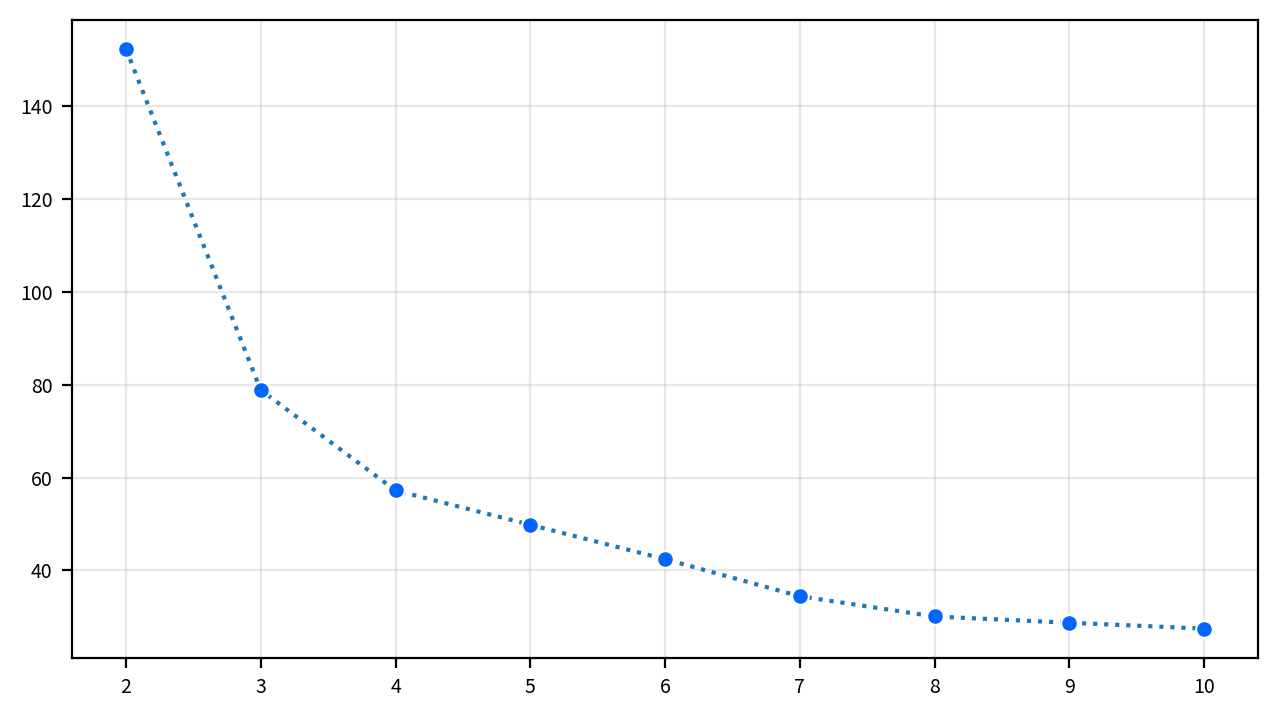

In [5]:
figsize=(1280/my_dpi, 720/my_dpi)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize, dpi=my_dpi)

sb.lineplot(x=klist, y=inertia, linestyle=':', marker='o', markerfacecolor='#0066ff', markeredgecolor='#ffffff')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()

In [6]:
slope_list=[0]

for i in range(1, len(inertia)):
    x1=klist[i-1]
    y1=inertia[i-1]
    x2=klist[i]
    y2=inertia[i]

    slope, _=np.polyfit([x1,x2], [y1,y2], 1)
    slope_list.append(slope)

slope_list

[0,
 np.float64(-73.4922859343805),
 np.float64(-21.62719261169159),
 np.float64(-7.4007326559934485),
 np.float64(-7.406194805194824),
 np.float64(-8.001353966813582),
 np.float64(-4.355598712690802),
 np.float64(-1.3487365371986073),
 np.float64(-1.2537377450980371)]

In [7]:
avg_slope=np.mean(slope_list)
avg_slope

np.float64(-13.876203663229042)

In [8]:
ev=[]
ei=[]
for i, v in enumerate(slope_list):
    if v<avg_slope:
        ev.append(v)
        ei.append(i)
elbow_point=ei[np.argmax(ev)]
elbow_point

2

In [9]:
best_k=klist[elbow_point]
best_k

4

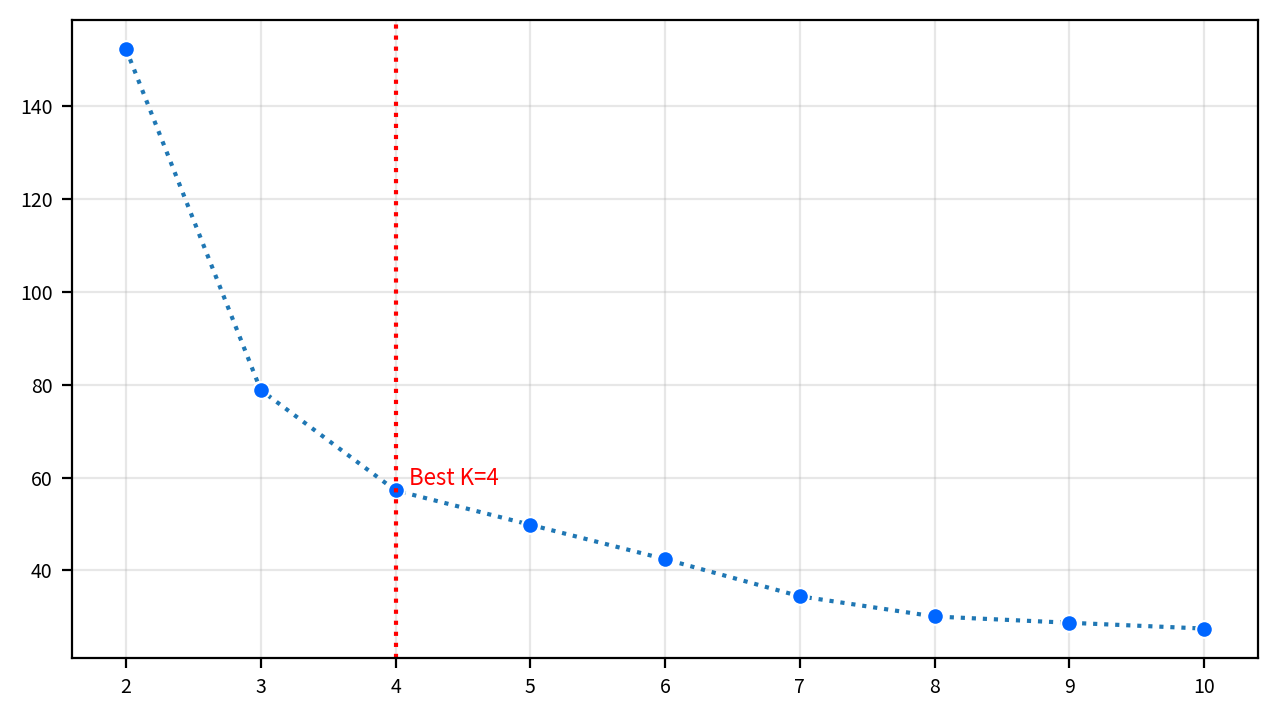

In [10]:
figsize=(1280/my_dpi, 720/my_dpi)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize, dpi=my_dpi)

sb.lineplot(x=klist, y=inertia, linestyle=':', marker='o', markerfacecolor='#0066ff', markeredgecolor='#ffffff')
ax.axvline(x=best_k, color='red', linestyle=':')
ax.text(best_k+0.1, inertia[elbow_point]+0.1, 'Best K=%d'%best_k, fontsize=8, ha='left', va='bottom', color='r')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()

In [11]:
kl=KneeLocator(klist, inertia, curve='convex', direction='decreasing')
best_k=kl.elbow
best_y=kl.elbow_y
print('found elbow :', best_k)
print('found y :', best_y)

found elbow : 4
found y : 57.228473214285714


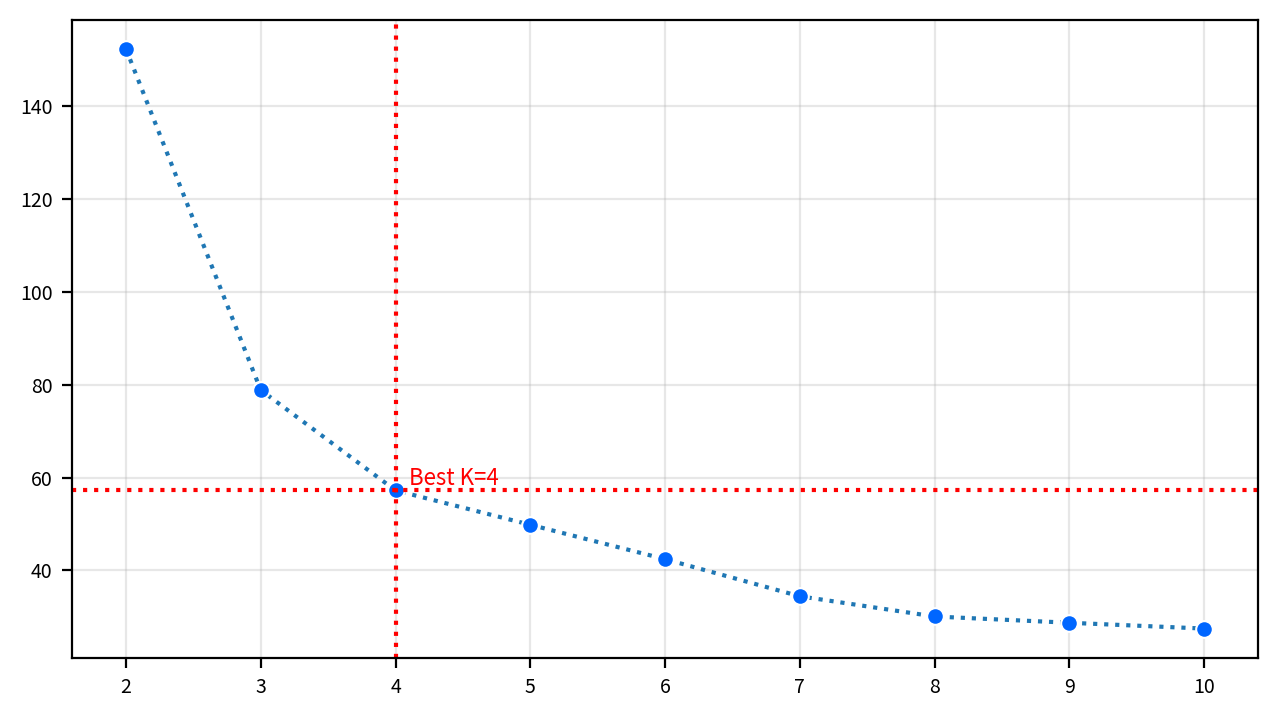

In [12]:
figsize=(1280/my_dpi, 720/my_dpi)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize, dpi=my_dpi)

sb.lineplot(x=klist, y=inertia, linestyle=':', marker='o', markerfacecolor='#0066ff', markeredgecolor='#ffffff')
ax.axvline(x=best_k, color='red', linestyle=':')
ax.axhline(y=best_y, color='red', linestyle=':')
ax.text(best_k+0.1, inertia[elbow_point]+0.1, 'Best K=%d'%best_k, fontsize=8, ha='left', va='bottom', color='r')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()

In [13]:
estimator=KMeans(n_clusters=best_k)
estimator.fit(df)
cluster=estimator.predict(df)
df['ClusterID']=cluster
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,ClusterID
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


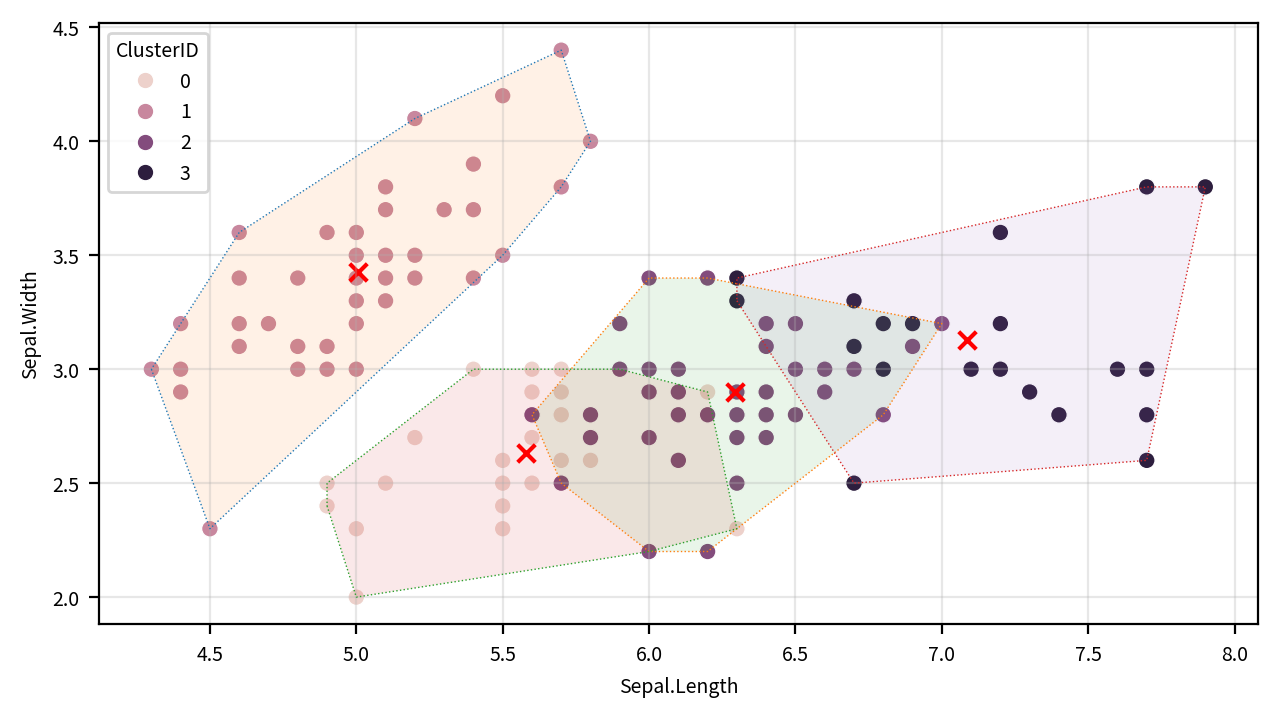

In [14]:
vdf=df.copy()
hue_field='ClusterID'
x_field='Sepal.Length'
y_field='Sepal.Width'

width_px=1280
height_px=720
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

sb.scatterplot(data=vdf, x=x_field, y=y_field, hue=hue_field)

for c in vdf[hue_field].unique():
    df_c=vdf.loc[vdf[hue_field]==c, [x_field, y_field]]
    try:
        # 외곽선 좌표 계산
        hull=ConvexHull(df_c)
        # 마지막 좌표 이후에 첫 번째 좌표를 연결
        points=np.append(hull.vertices, hull.vertices[0])
        ax.plot(df_c.iloc[points, 0], df_c.iloc[points, 1], linewidth=0.5, linestyle=':')
        ax.fill(df_c.iloc[points, 0], df_c.iloc[points, 1], alpha=0.1)
    except:
        pass

ax.scatter(estimator.cluster_centers_[:,0], estimator.cluster_centers_[:,1], marker='x', c='red', alpha=1, s=40)

ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()